# Customer Satisfaction Prediction

## Objective:
The goal of this project is to predict customer satisfaction using historical data. This
involves using machine learning algorithms to analyze factors that influence customer
satisfaction and build a predictive model.

---

## 1. Problem Statement
The task is to do EDA on dataset and build a model to predict customer satisfaction based on the features provided. The challenge is to create a model that can accurately predict the outcome.

---

## 2. Data Pre-Processing

### 2.1 Data Inspection and Summary Statistics
- **Load the Dataset:** Import the dataset and review its basic structure, including column names, data types, and a few initial records.
- **Generate Summary Statistics:** Calculate key statistics (mean, median, min, max, standard deviation, etc.) to understand the primary characteristics of each column.
- Changing column names and data types

### 2.2 Data Cleaning and Feature Engineering
- **Missing Values:** Check and handle missing values if present.
- **Duplicate Values:** Check duplicate values and handle if present.


### 2.3 Outlier Treatment
- **Outlier Detection:** Identify outliers in features  box plots or Z-scores and apply treatment if necessary.

---

## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis
- **Numerical Data:** Visualize distributions with histograms and box plots.
- **Categorical Data:** Use bar charts to observe the distribution of the outcome variable.

### 3.2 Bivariate Analysis
- Create scatter plots to observe relationships between numerical features.
- Use box plots to explore how numerical features differ based on the outcome variable.

### 3.3 Multivariate Analysis
- Generate a heatmap of the correlation matrix to identify potential relationships.

---

## 4. Model Building

### 4.1 Encoding Categorical Variables:
- Convert the Categorical columns to binary format 
### 4.2 Feature Engineering 
 - This step involves transforming raw data into meaningful features and outcome
### 4.3 Model Training
- Split the dataset into training and testing sets.
- Scalling the data
- Use a Linear Regression to train the model on the training data.
- Model Evaluation
- Visualize the result

### 5. Advanced Modeling: 
- Experiment with more complex models like RandomForest  to improve predictions.

### Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import warnings # ignore warnings

warnings.filterwarnings('ignore')

###  Load the Dataset

In [7]:
data = pd.read_csv('C://Users//PC//Downloads//customer_support_tickets.csv')

In [8]:
data.head() # First 5 records

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [9]:
data.tail() # Last 5 records

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


### 2 Data Preprocessing

#### 2.1 Data Inspection and Summary Statistics

In [12]:
data.shape # rews and col.

(8469, 17)

In [13]:
data.ndim # dimentionality of data

2

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [15]:
data.describe() # Description of data

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [16]:
data.size # Total no. of elements

143973

### 2.2 Data Cleaning

#### Renaming columns

In [19]:
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [20]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [21]:
data.columns

Index(['ticket_id', 'customer_name', 'customer_email', 'customer_age',
       'customer_gender', 'product_purchased', 'date_of_purchase',
       'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status',
       'resolution', 'ticket_priority', 'ticket_channel',
       'first_response_time', 'time_to_resolution',
       'customer_satisfaction_rating'],
      dtype='object')

#### Changing datatypes of col.

In [23]:
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'])
data['first_response_time'] = pd.to_datetime(data['first_response_time'])
data['time_to_resolution'] = pd.to_datetime(data['time_to_resolution'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ticket_id                     8469 non-null   int64         
 1   customer_name                 8469 non-null   object        
 2   customer_email                8469 non-null   object        
 3   customer_age                  8469 non-null   int64         
 4   customer_gender               8469 non-null   object        
 5   product_purchased             8469 non-null   object        
 6   date_of_purchase              8469 non-null   datetime64[ns]
 7   ticket_type                   8469 non-null   object        
 8   ticket_subject                8469 non-null   object        
 9   ticket_description            8469 non-null   object        
 10  ticket_status                 8469 non-null   object        
 11  resolution                    

In [25]:
# Unique values of columns

print("# unique values in ticket_id:", data['ticket_id'].nunique())
print("# unique values in customer_name:", data['customer_name'].nunique())
print("# unique values in customer_email:", data['customer_email'].nunique())
print("# unique values in customer_age:", data['customer_age'].nunique())
print("# unique values in customer_gender:", data['customer_gender'].nunique())
print("# unique values in product_purchased:", data['product_purchased'].nunique())
print("# unique values in date_of_purchase:", data['date_of_purchase'].nunique())
print("# unique values in ticket_type:", data['ticket_type'].nunique())
print("# unique values in ticket_subject:", data['ticket_subject'].nunique())
print("# unique values in ticket_description:", data['ticket_description'].nunique())
print("# unique values in resolution:", data['resolution'].nunique())
print("# unique values in ticket_priority:", data['ticket_priority'].nunique())
print("# unique values in ticket_status:", data['ticket_status'].nunique())
print("# unique values in ticket_channel:", data['ticket_channel'].nunique())
print("# unique values in first_response_time:", data['first_response_time'].nunique())
print("# unique values in time_to_resolution:", data['time_to_resolution'].nunique())
print("# unique values in customer_satisfaction_rating:", data['customer_satisfaction_rating'].nunique())

# unique values in ticket_id: 8469
# unique values in customer_name: 8028
# unique values in customer_email: 8320
# unique values in customer_age: 53
# unique values in customer_gender: 3
# unique values in product_purchased: 42
# unique values in date_of_purchase: 730
# unique values in ticket_type: 5
# unique values in ticket_subject: 16
# unique values in ticket_description: 8077
# unique values in resolution: 2769
# unique values in ticket_priority: 4
# unique values in ticket_status: 3
# unique values in ticket_channel: 4
# unique values in first_response_time: 5470
# unique values in time_to_resolution: 2728
# unique values in customer_satisfaction_rating: 5


#### Missing Values

In [27]:
data.isnull().sum()

ticket_id                          0
customer_name                      0
customer_email                     0
customer_age                       0
customer_gender                    0
product_purchased                  0
date_of_purchase                   0
ticket_type                        0
ticket_subject                     0
ticket_description                 0
ticket_status                      0
resolution                      5700
ticket_priority                    0
ticket_channel                     0
first_response_time             2819
time_to_resolution              5700
customer_satisfaction_rating    5700
dtype: int64

In [28]:
# Handling null values by replacing as if we remove Nan rows, there will be only rows with ticket status as Open.

data['resolution'] = data['resolution'].fillna('Not Provided')
data = data.fillna(0)



In [29]:
data.isnull().sum()

ticket_id                       0
customer_name                   0
customer_email                  0
customer_age                    0
customer_gender                 0
product_purchased               0
date_of_purchase                0
ticket_type                     0
ticket_subject                  0
ticket_description              0
ticket_status                   0
resolution                      0
ticket_priority                 0
ticket_channel                  0
first_response_time             0
time_to_resolution              0
customer_satisfaction_rating    0
dtype: int64

In [30]:
data.head()

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Not Provided,Critical,Social media,2023-06-01 12:15:36,0,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Not Provided,Critical,Chat,2023-06-01 16:45:38,0,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


#### Duplicate Values

In [32]:
data.duplicated().sum()

0

##### There are no duplicate values

#### 2.3 Outlier Treatment

In [35]:
data.dtypes

ticket_id                                int64
customer_name                           object
customer_email                          object
customer_age                             int64
customer_gender                         object
product_purchased                       object
date_of_purchase                datetime64[ns]
ticket_type                             object
ticket_subject                          object
ticket_description                      object
ticket_status                           object
resolution                              object
ticket_priority                         object
ticket_channel                          object
first_response_time                     object
time_to_resolution                      object
customer_satisfaction_rating           float64
dtype: object

<Axes: ylabel='customer_satisfaction_rating'>

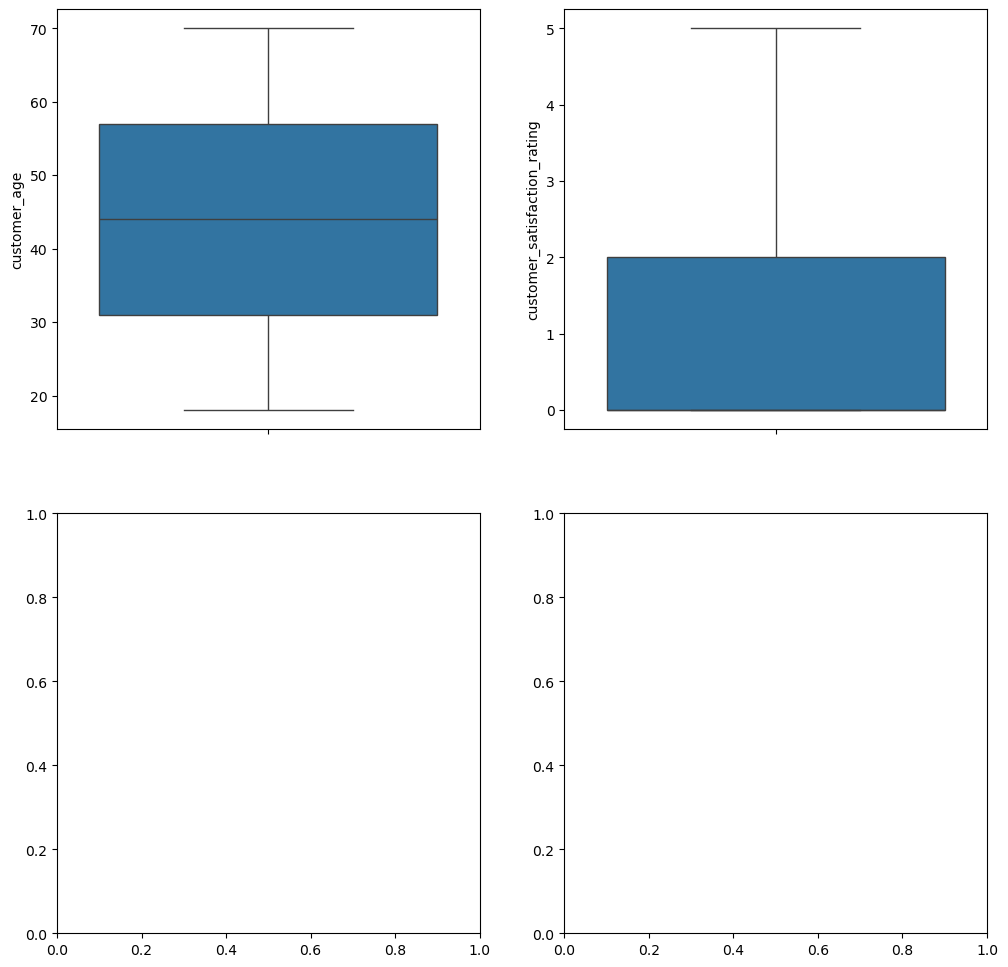

In [36]:
# Checking outlier by using boxplot

fig,axis = plt.subplots(2,2,figsize=(12,12))
sns.boxplot(ax=axis[0][0], data = data['customer_age'])
sns.boxplot(ax=axis[0][1], data = data['customer_satisfaction_rating'])



##### There are no outliers in customer age and customer satisfaction 

### 3. EDA
### 3.1 Univariate Analysis  
Visualize individual variables to understand their distribution (e.g., histograms for numerical data, bar charts for categorical data).  


### 3.2 Bivariate and Multivariate Analysis  
Explore relationships between variables by visualizing pairs of variables or groups of variables (e.g., scatter plots, heatmaps).  



#### 3.1 Univariate Analysis

##### Identify common issue(Top 10 issues)

In [41]:
# Identify common issue

top_issue = data['ticket_subject'].value_counts().head(10).reset_index()
top_issue

,ticket_subject,count
0,Refund request,576
1,Software bug,574
2,Product compatibility,567
3,Delivery problem,561
4,Hardware issue,547
5,Battery life,542
6,Network problem,539
7,Installation support,530
8,Product setup,529
9,Payment issue,526


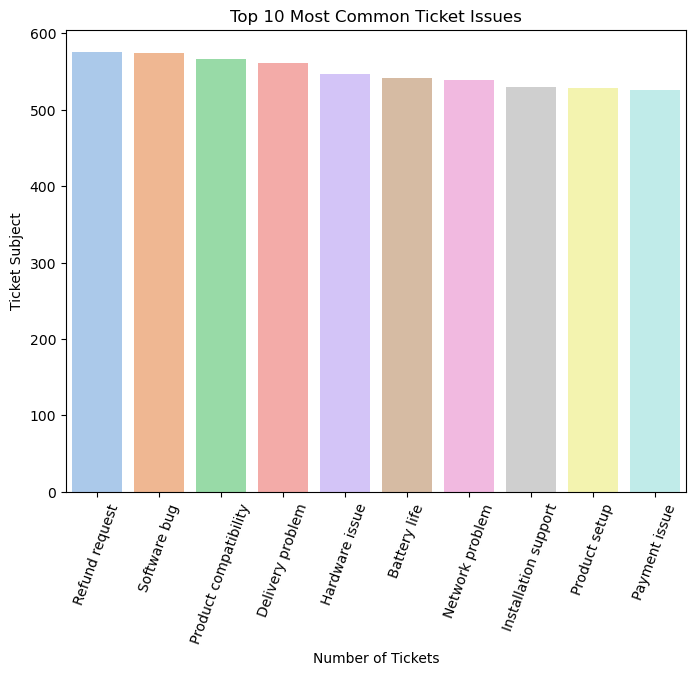

In [42]:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_issue,x ='ticket_subject',y='count', palette='pastel')
    plt.xticks(rotation=70)
    plt.title('Top 10 Most Common Ticket Issues')
    plt.xlabel('Number of Tickets')
    plt.ylabel('Ticket Subject')
    plt.show()

##### Top 5 products with most tickets

In [44]:
top_product = data['product_purchased'].value_counts().head(5).reset_index()
top_product

,product_purchased,count
0,Canon EOS,240
1,GoPro Hero,228
2,Nest Thermostat,225
3,Philips Hue Lights,221
4,Amazon Echo,221


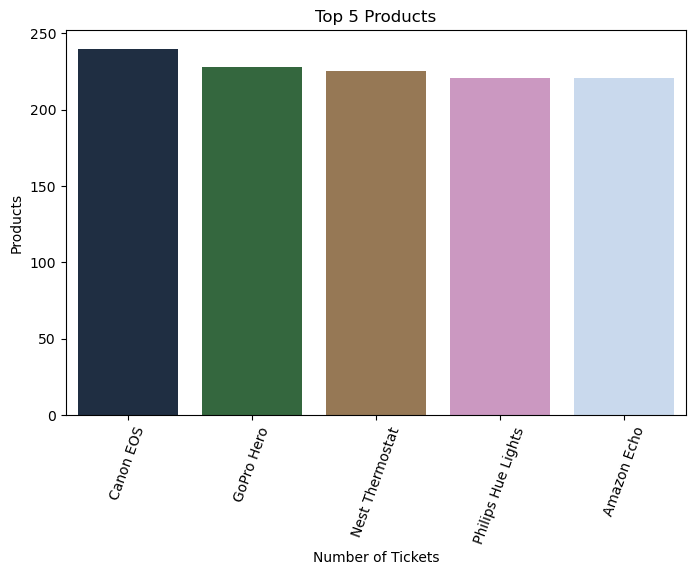

In [45]:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=top_product,x ='product_purchased',y='count', palette='cubehelix')
    plt.xticks(rotation=70)
    plt.title('Top 5 Products')
    plt.xlabel('Number of Tickets')
    plt.ylabel('Products')
    plt.show()

##### Ticket trend over time

In [47]:
data['year_month'] = data['date_of_purchase'].dt.to_period('M')

In [48]:
ticket_trends = data.groupby('year_month').size()
ticket_trends

year_month
2020-01    377
2020-02    376
2020-03    324
2020-04    354
2020-05    322
2020-06    358
2020-07    366
2020-08    327
2020-09    369
2020-10    373
2020-11    340
2020-12    350
2021-01    359
2021-02    339
2021-03    348
2021-04    364
2021-05    379
2021-06    320
2021-07    361
2021-08    364
2021-09    327
2021-10    362
2021-11    364
2021-12    346
Freq: M, dtype: int64

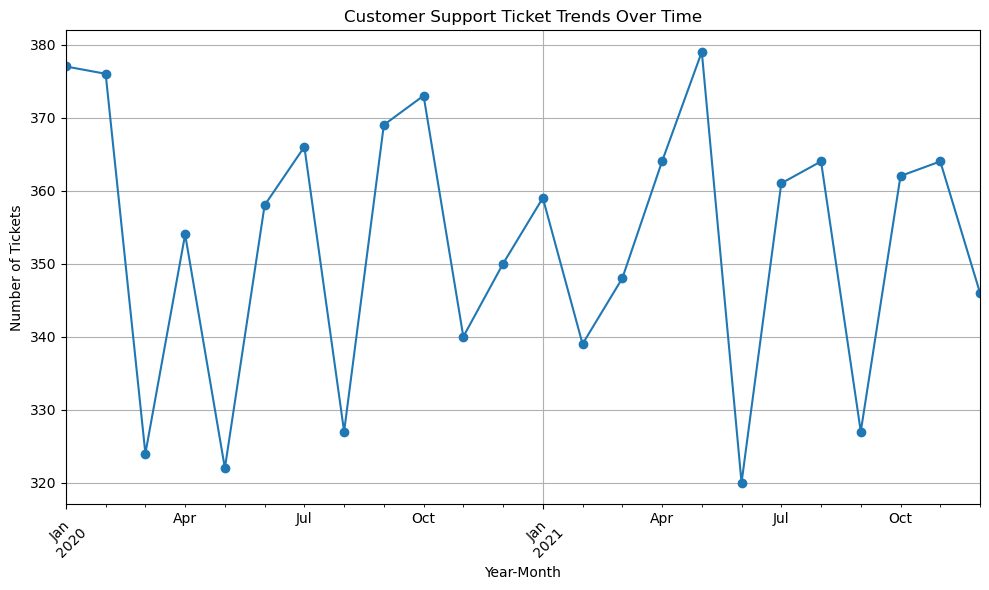

In [49]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Segmentation based on Ticket type

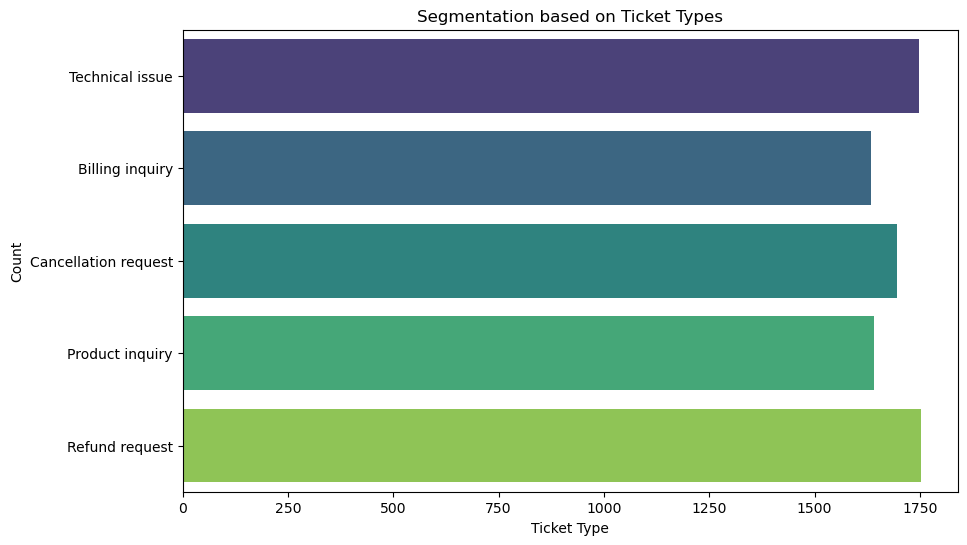

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data['ticket_type'], palette='viridis')
plt.title('Segmentation based on Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
 
plt.show()

##### Segmentation based on Customer Statifaction level

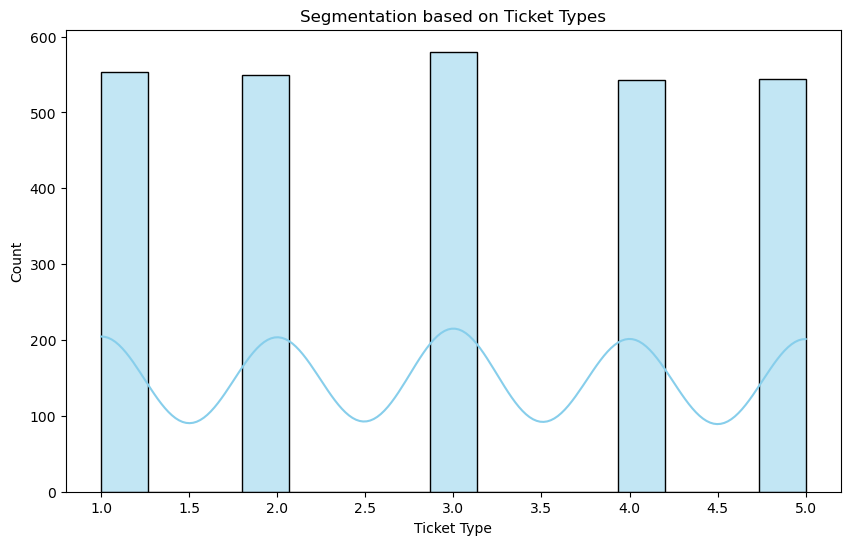

In [53]:
customer_rating = data[data['customer_satisfaction_rating']!=0]
plt.figure(figsize=(10, 6))
sns.histplot(customer_rating['customer_satisfaction_rating'],
kde=True, color='skyblue')
plt.title('Segmentation based on Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
 
plt.show()

##### Ticket Status Distribution

In [55]:
ticket_status  = data['ticket_status'].value_counts()

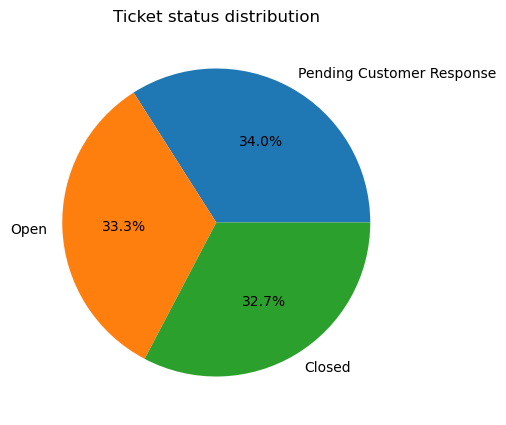

In [56]:
plt.figure(figsize=(7,5))
plt.pie(ticket_status,labels=ticket_status.index,autopct='%1.1f%%')
plt.title("Ticket status distribution")

plt.show()

##### Customer age distribution

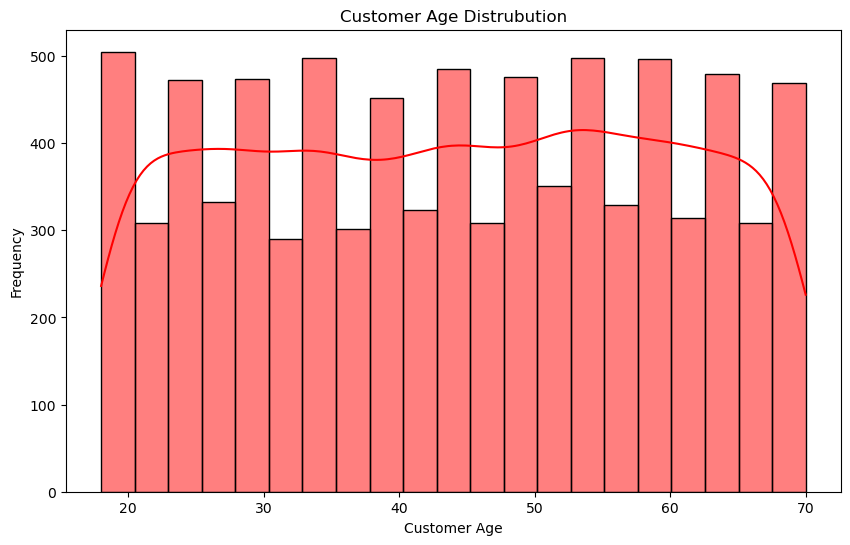

In [58]:

plt.figure(figsize=(10, 6))
sns.histplot(data['customer_age'],
kde=True, color='red')
plt.title('Customer Age Distrubution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
 
plt.show()

##### Customer Gender Distribution

In [60]:
gender = data['customer_gender'].value_counts()

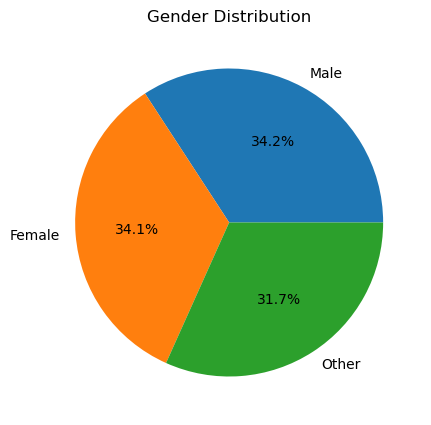

In [61]:
plt.figure(figsize=(7,5))
plt.pie(gender,labels=gender.index,autopct='%1.1f%%')
plt.title("Gender Distribution")

plt.show()

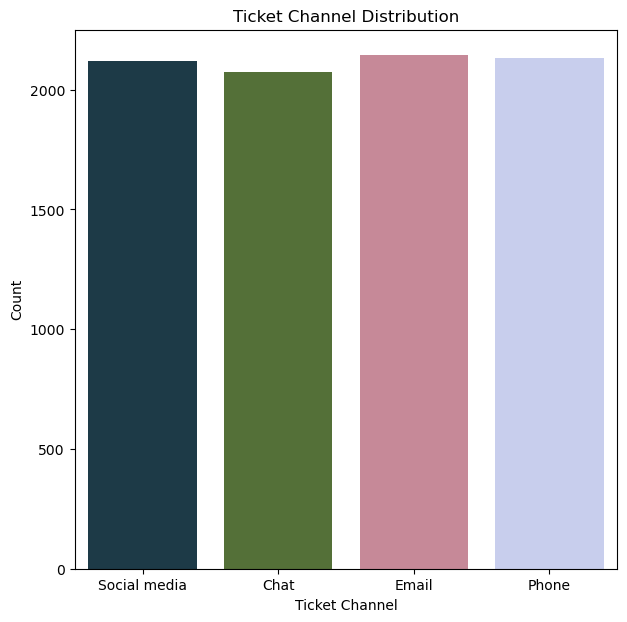

In [62]:
plt.figure(figsize=(7, 7))
sns.countplot(x=data['ticket_channel'],palette='cubehelix')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.show()

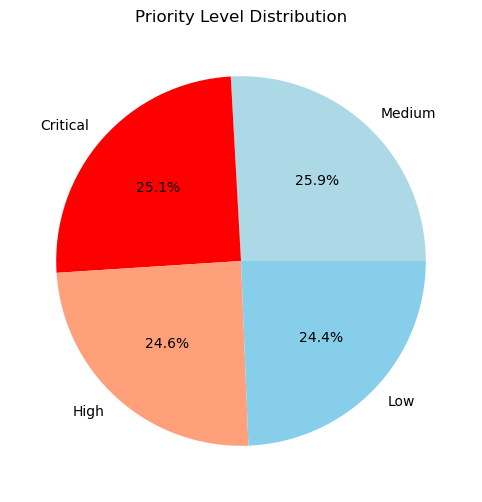

In [63]:
# Count ticket priorities
priority = data['ticket_priority'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.pie(priority,labels=priority.index, autopct='%1.1f%%', colors=['lightblue', 'red', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

#### 3.2 Bivariate analysis

##### Customer Age vs Statisfaction Rating

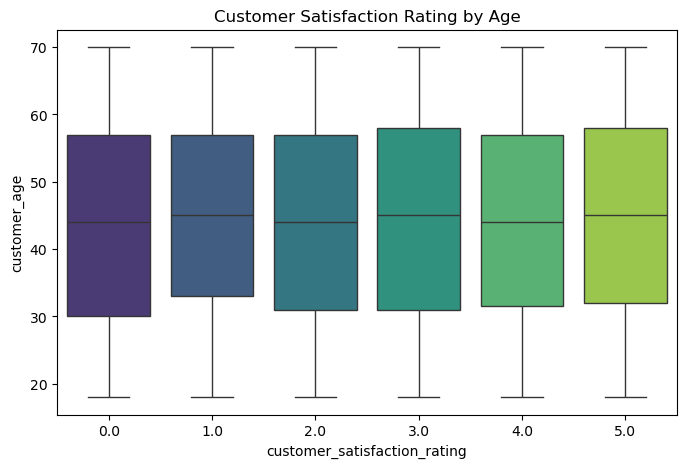

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='customer_satisfaction_rating', y='customer_age', palette='viridis')
plt.title('Customer Satisfaction Rating by Age')
plt.show()


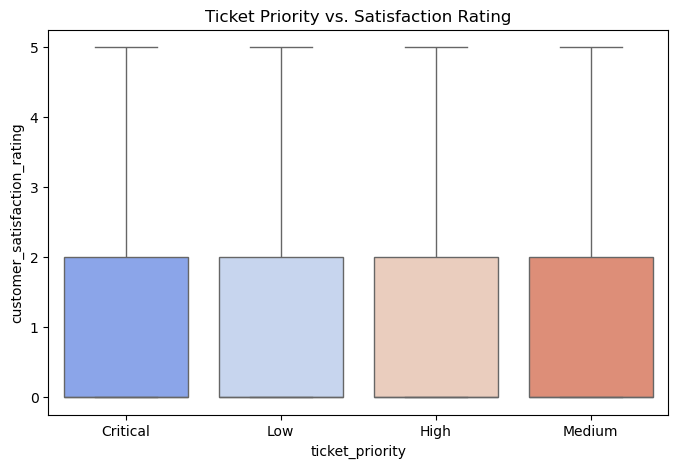

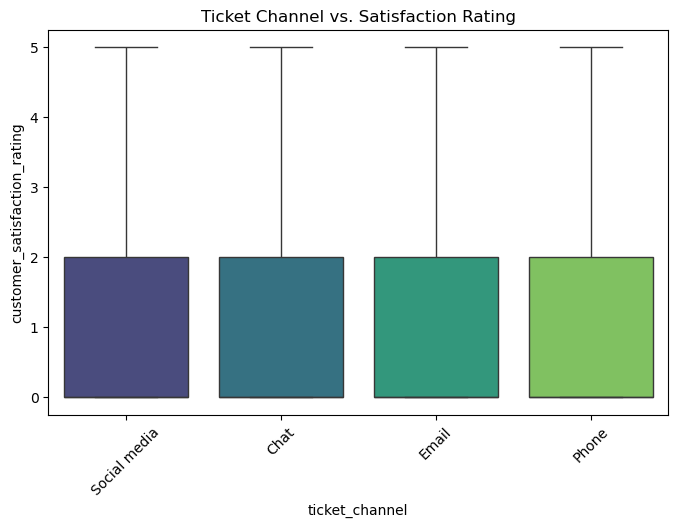

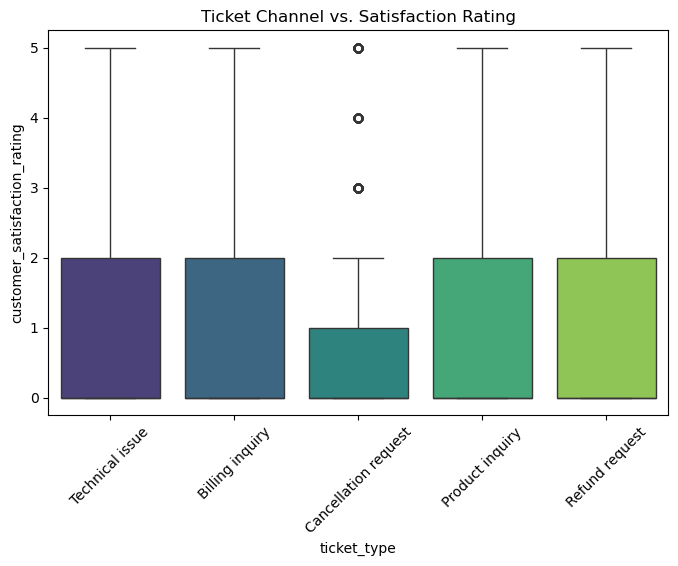

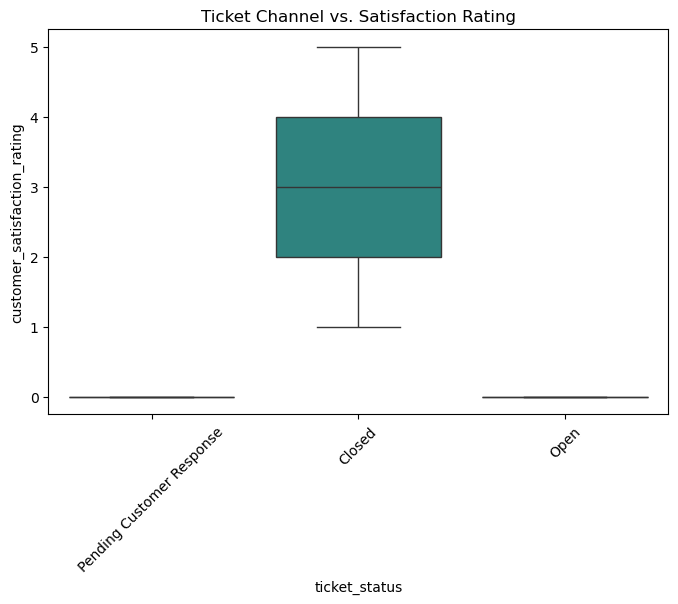

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='ticket_priority', y='customer_satisfaction_rating', data=data, palette='coolwarm')
plt.title('Ticket Priority vs. Satisfaction Rating')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='ticket_channel', y='customer_satisfaction_rating', data=data, palette='viridis')
plt.title('Ticket Channel vs. Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='ticket_type', y='customer_satisfaction_rating', data=data, palette='viridis')
plt.title('Ticket Channel vs. Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='ticket_status', y='customer_satisfaction_rating', data=data, palette='viridis')
plt.title('Ticket Channel vs. Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()

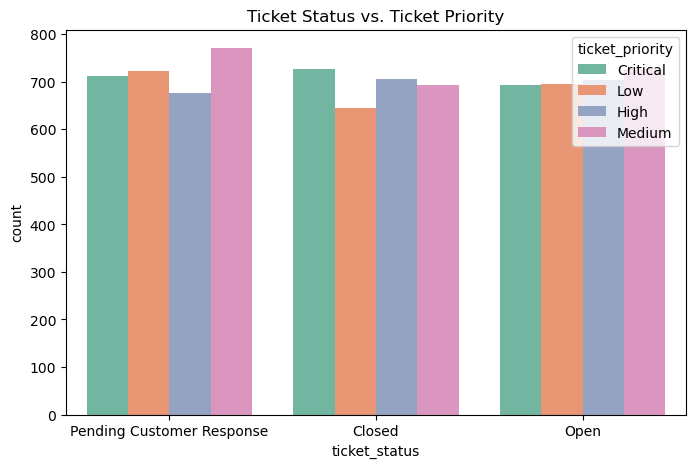

In [68]:
# Ticket Status vs Ticket Priority

plt.figure(figsize=(8, 5))
sns.countplot(x='ticket_status', hue='ticket_priority', data=data, palette='Set2')
plt.title('Ticket Status vs. Ticket Priority')
plt.show()



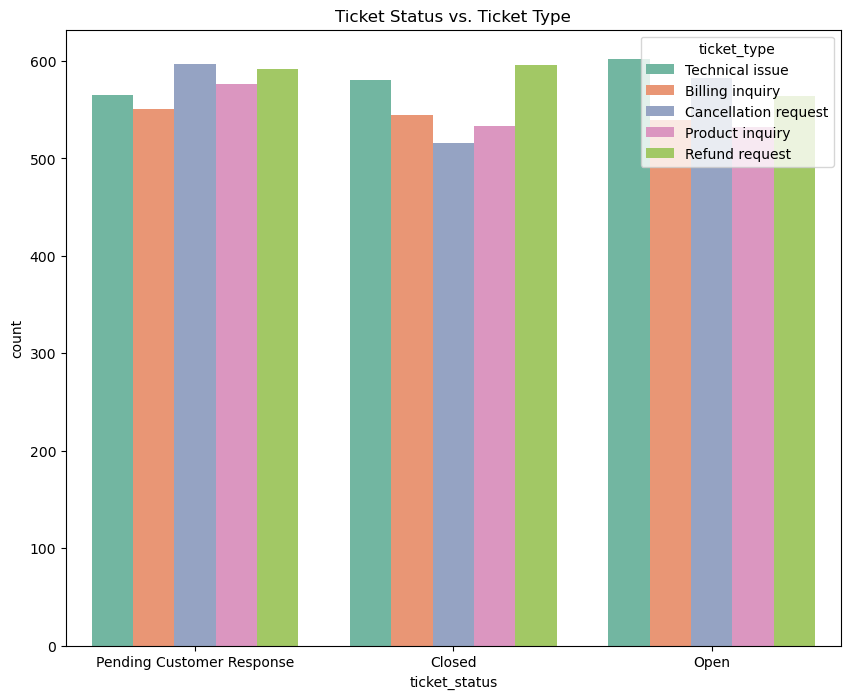

In [69]:
# Ticket status vs ticket type

plt.figure(figsize=(10, 8))
sns.countplot(x='ticket_status', hue='ticket_type', data=data, palette='Set2')
plt.title('Ticket Status vs. Ticket Type')
plt.show()



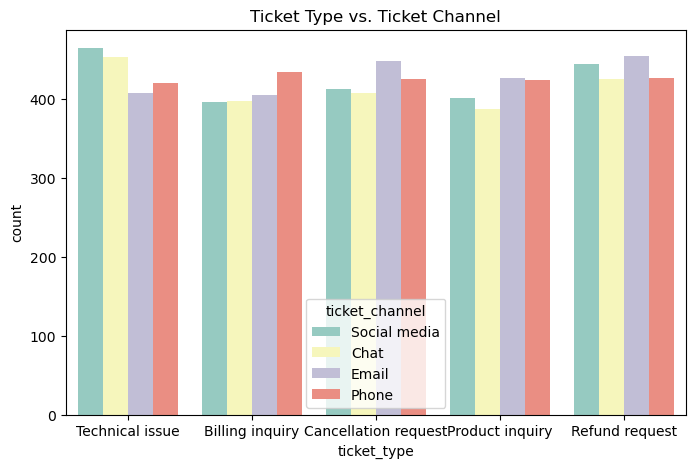

In [70]:
# Ticket type vs ticket channel

plt.figure(figsize=(8, 5))
sns.countplot(x='ticket_type', hue='ticket_channel', data=data, palette='Set3')
plt.title('Ticket Type vs. Ticket Channel')
plt.show()



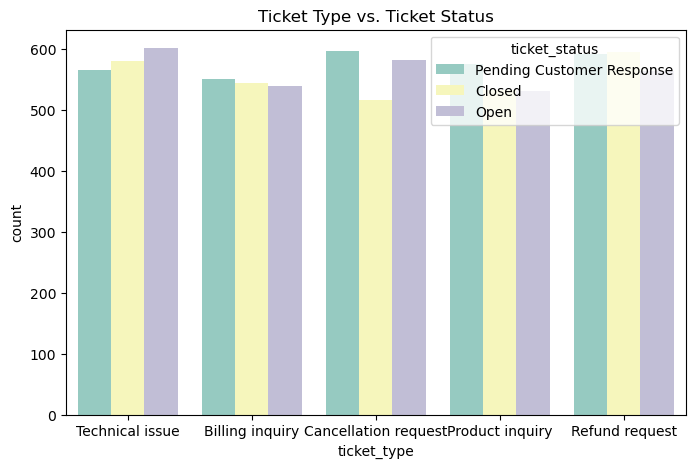

In [71]:
# Ticket type vs ticket status

plt.figure(figsize=(8, 5))
sns.countplot(x='ticket_type', hue='ticket_status', data=data, palette='Set3')
plt.title('Ticket Type vs. Ticket Status')
plt.show()

In [72]:
# For EDA Nan values were replaced with 0. Replacing 0 again with NAN so that they can be dropped and can do model building

data= data.replace({0:np.nan})
data['resolution'] = data['resolution'].replace({'Not Provided':np.nan})

In [73]:
data.isnull().sum()

ticket_id                          0
customer_name                      0
customer_email                     0
customer_age                       0
customer_gender                    0
product_purchased                  0
date_of_purchase                   0
ticket_type                        0
ticket_subject                     0
ticket_description                 0
ticket_status                      0
resolution                      5700
ticket_priority                    0
ticket_channel                     0
first_response_time             2819
time_to_resolution              5700
customer_satisfaction_rating    5700
year_month                         0
dtype: int64

In [74]:
data = data.dropna()

In [75]:
data.isnull().sum()

ticket_id                       0
customer_name                   0
customer_email                  0
customer_age                    0
customer_gender                 0
product_purchased               0
date_of_purchase                0
ticket_type                     0
ticket_subject                  0
ticket_description              0
ticket_status                   0
resolution                      0
ticket_priority                 0
ticket_channel                  0
first_response_time             0
time_to_resolution              0
customer_satisfaction_rating    0
year_month                      0
dtype: int64

### 4. Model Building

### 4.1 Encoding Categorical columns

In [78]:
#### Feature Engineering and Encoding

label = LabelEncoder()

columns_to_encode = [
    'customer_age',
    'customer_gender',
    'product_purchased',
    'ticket_type',
    'ticket_subject',
    'ticket_priority',
    'ticket_channel',
    'ticket_status'
]

for col in columns_to_encode:
    data[col] = label.fit_transform(data[col])


#### 5.2 Feature Engineering

In [80]:
X = data.drop(columns=['ticket_id','customer_name','customer_email','date_of_purchase','first_response_time','time_to_resolution','customer_satisfaction_rating','year_month','ticket_description','resolution'])
y = data['customer_satisfaction_rating']


In [81]:
# Split the data into training and testing

X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


#### 5.3 Model Training

In [83]:
# Using Linear Regression to predict customer satisfaction

model = LinearRegression()

# Training the model
model.fit(X_train, y_train) 

# Make Prediction
y_pred = model.predict(X_test)


#### Model Evaluation

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

 Root Mean Squared Error: 1.4044048137893521
R-squared: 8.976393601789479e-05


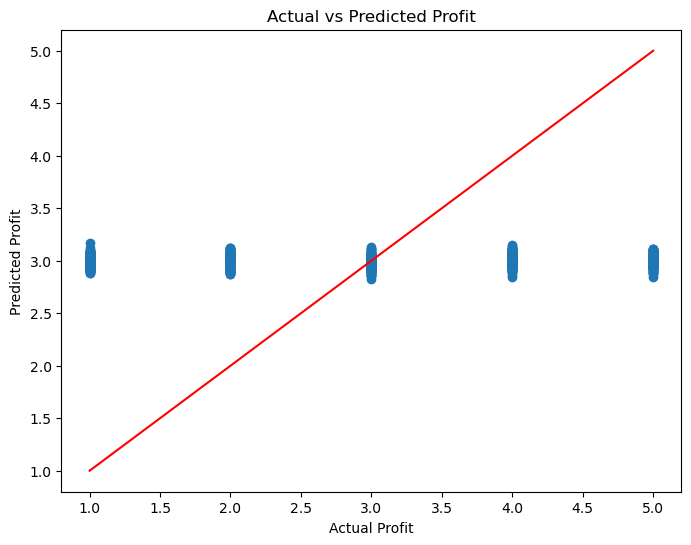

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

### 5. Advance Model

In [88]:
# Random Forest

model = RandomForestClassifier(n_estimators=50, random_state=42)

model.fit(X_train,y_train)

y_pred_random = model.predict(X_test)

In [89]:
mse_random = mean_squared_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse)
r2_random = r2_score(y_test, y_pred_random)

print(f" Root Mean Squared Error: {rmse_random}")
print(f"R-squared: {r2_random}")

 Root Mean Squared Error: 1.4044048137893521
R-squared: -0.8091446826153241
